## 1. Load and Explore the Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('mock_kaggle.csv')

# Explore the first few rows
df.head()


,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [6]:
df.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


## 2.  Visualize the Time Series

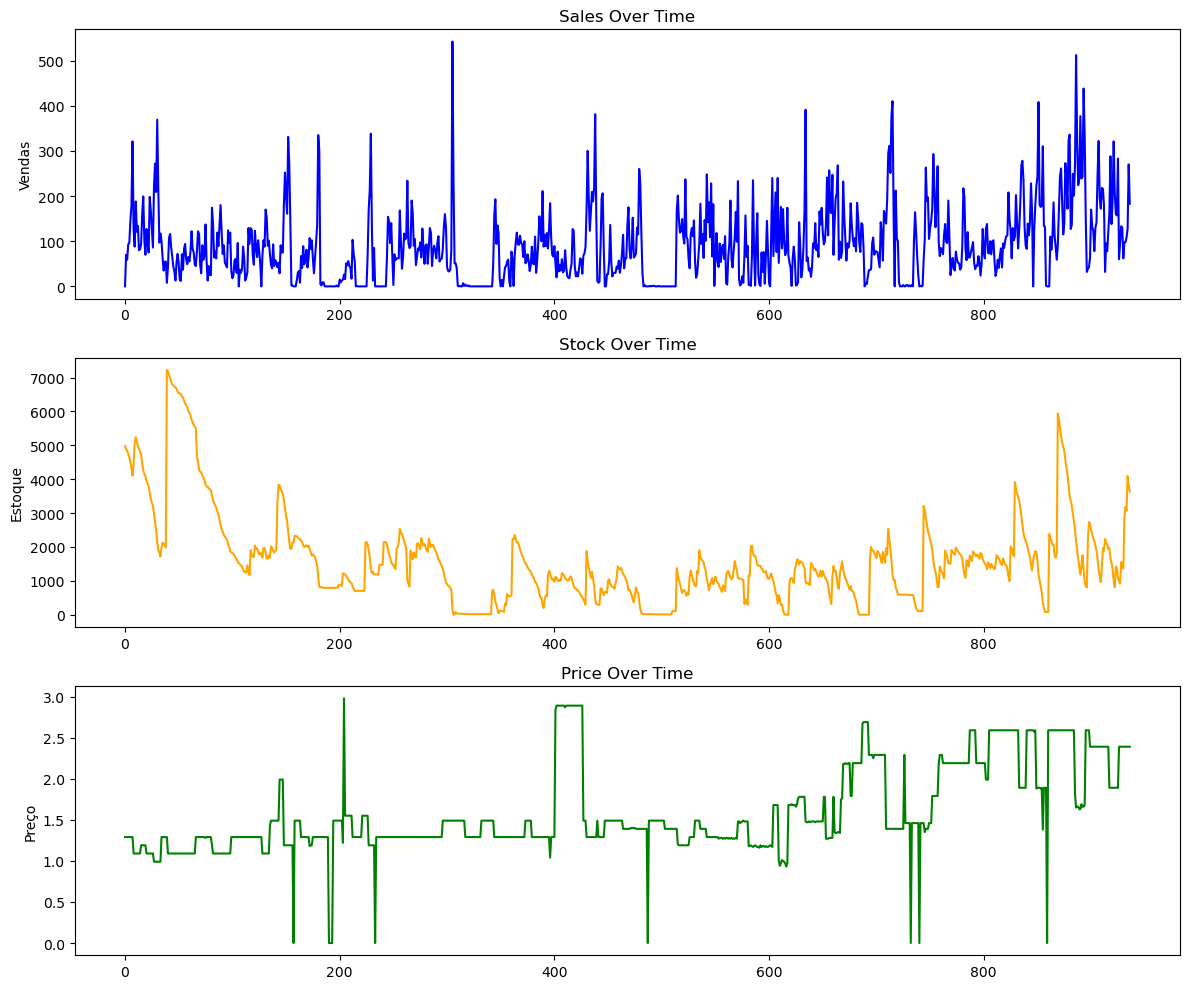

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

df['venda'].plot(ax=axes[0], title='Sales Over Time', color='blue')
axes[0].set_ylabel('Vendas')

df['estoque'].plot(ax=axes[1], title='Stock Over Time', color='orange')
axes[1].set_ylabel('Estoque')

df['preco'].plot(ax=axes[2], title='Price Over Time', color='green')
axes[2].set_ylabel('Preço')

plt.tight_layout()
plt.show()

## 3. Check for Missing Values and Anomalies

In [9]:
# Check for missing values
print(df.isnull().sum())

# Check for zeros or outliers (example for 'venda')
print(df[df['venda'] == 0].shape[0])  # Count of zero sales

data       0
venda      0
estoque    0
preco      0
dtype: int64
112


## 4.Decompose the Time Series

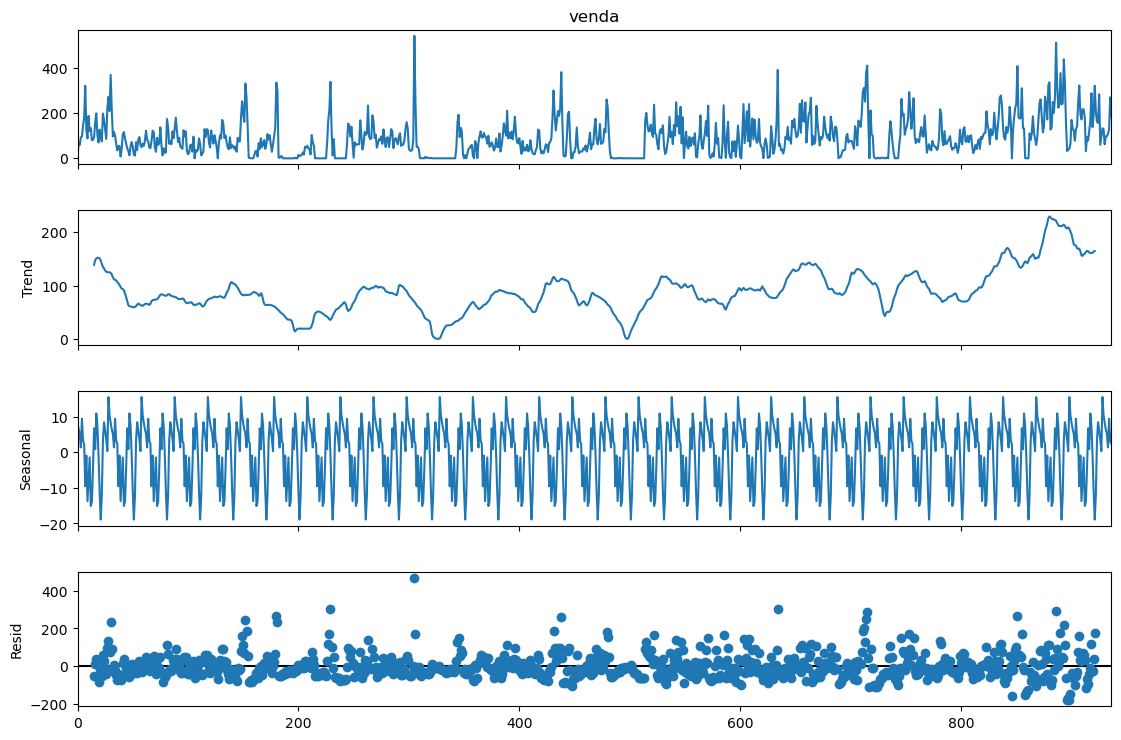

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose (use a model like 'additive' or 'multiplicative')
decomposition = seasonal_decompose(df['venda'].dropna(), model='additive', period=30)  # adjust period as needed

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

## .5 Stationarity Check

In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['venda'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.326902281189404
p-value: 4.81508920136582e-06


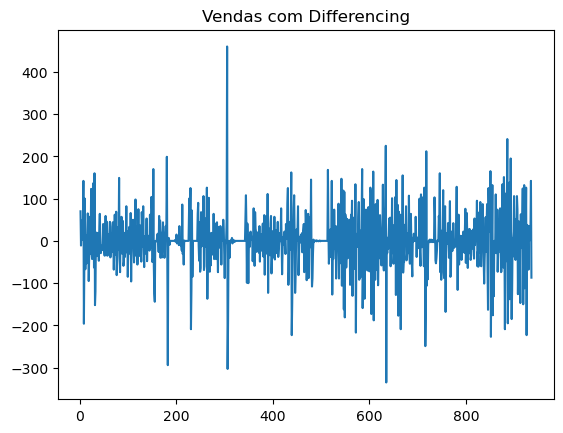

In [12]:
df['venda_diff'] = df['venda'].diff()
df['venda_diff'].plot(title='Vendas com Differencing')
plt.show()

## 6. Autocorrelation and Partial Autocorrelation
## Plot ACF and PACF to identify potential ARIMA parameters:

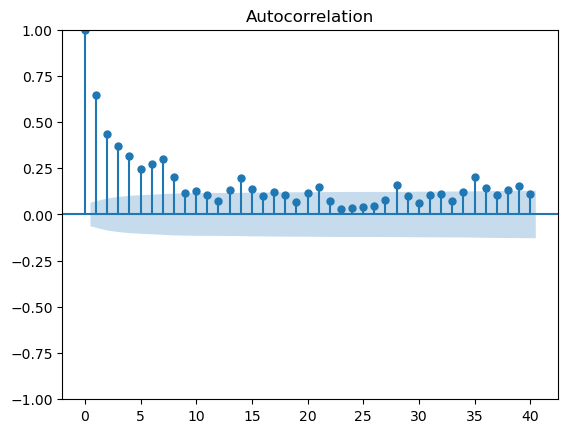

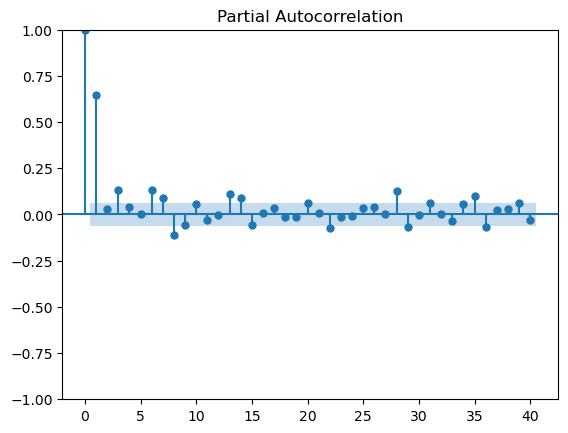

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['venda'].dropna(), lags=40)
plot_pacf(df['venda'].dropna(), lags=40)
plt.show()

## 7. Build a Time Series Model (e.g., ARIMA)

                               SARIMAX Results                                
Dep. Variable:                  venda   No. Observations:                  937
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5176.376
Date:                Sun, 02 Nov 2025   AIC                          10358.753
Time:                        11:14:43   BIC                          10373.277
Sample:                             0   HQIC                         10364.291
                                - 937                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5874      0.023     25.591      0.000       0.542       0.632
ma.L1         -0.9810      0.006   -155.385      0.000      -0.993      -0.969
sigma2      3716.4611     91.513     40.611      0.0

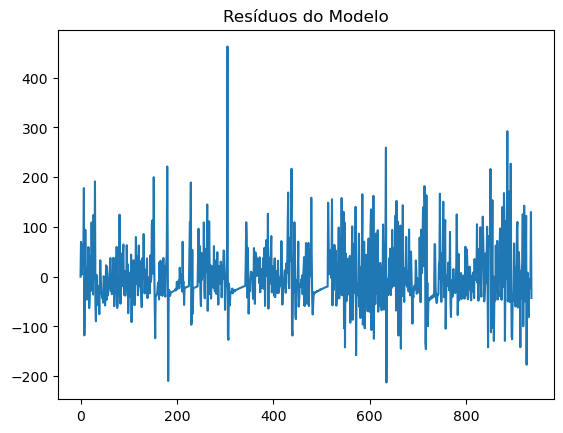

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust order (p,d,q) based on ACF/PACF)
model = ARIMA(df['venda'].dropna(), order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
residuals = model_fit.resid
residuals.plot(title='Resíduos do Modelo')
plt.show()

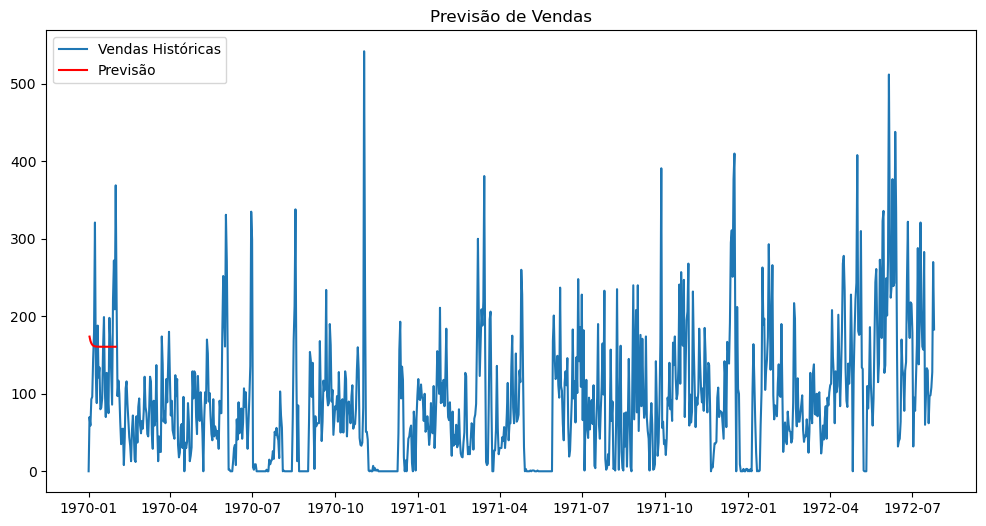

In [15]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['venda'], label='Vendas Históricas')
plt.plot(forecast_index, forecast, label='Previsão', color='red')
plt.legend()
plt.title('Previsão de Vendas')
plt.show()

## 9. Evaluate the Model

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example: Use last 10 values for validation
train = df['venda'][:-10]
test = df['venda'][-10:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)

mae = mean_absolute_error(test, forecast)
rmse = mean_squared_error(test, forecast, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 44.75723636967196
RMSE: 56.052634185196865


c:\ANACONDA\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
